# :: 4/28/2017 ::
# <a href="http://greenteapress.com/thinkstats2/html/">Think Stats</a>

Exploratory Data Analysis

	- Importing and cleaning (clean, transform and check)    
	- Single variable exploration (variable meaning / distribution of values / choose appropriate summary stats)    
	- Pair Wise exploration (identify relationship - table/scatter plot, correlation, linear fit)    
	- Multivariate analysis (if relationship found - multiple regression to add control variable)    
	- Estimation and hypothesis testing (Answer 3 Question
    		○ How big is the effect
        	○ Variability over repeated measurement
        	○ Is apparent effect due to chance?)        
    - Visualization (communicate result)
    
Dataset used by this book: 

The National Survey of Family Growth (NSFG), conducted by the U.S. Centers for Disease Control and Prevention (CDC) to gather
\information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health." (See
http://cdc.gov/nchs/nsfg.htm.)

The Behavioral Risk Factor Surveillance System (BRFSS), conducted
by the National Center for Chronic Disease Prevention and Health
Promotion to \track health conditions and risk behaviors in the United
States." (See http://cdc.gov/BRFSS/.)

Get the Book @ http://greenteapress.com/wp/think-stats-2e/

# [Chapter 1  Exploratory data analysis] [chapter-1] 
[chapter-1]: http://greenteapress.com/thinkstats2/html/thinkstats2002.html

Anecdotal Evidence fails because -

    (1) Small number of observation
    (2) Selection bias
    (3) Confirmation bias
    (4) Inaccuracy (misremembered, misrepresented, repeated inaccuracy..)
   
Statistical Approach - conclusion that are justifiable and likely correct
    
    - Data Collection (e.g: survey data)
    - Descriptive statistics (summarize data consizely and evaluate diff visualizations)
    - Exploratory data analysis (pattern, differences..., inconsitency and limitations)
    - Estimation (sample to represent general population)
    - Hypothesis testing (test if apparent effect is by chance)
    
Cross-sectional Study: collects data about different population at different time as a snapshot

Longitudinal study: follows same population over time

** Variables used: **
   
   - caseid - respondent id
   - prglngth - pregnancy in weeks
   - outcome - 1 if live birth
   - pregordr - 1 first pregnancy, 2 second pregnancy
   - birthord - #for live birth
   - birthwgt_lb, birthwgt_oz - weight lb and ounce
   - agepreg - mothers age at the end of pregnancy
   - finalwgt - #of people in US population represented by this respondent
    

In [85]:
%%HTML
<style>
div.prompt {display:none}
</style>
#remove IN[] OUT[]

In [2]:
from __future__ import print_function, division
import sys 
import os
#sys.path.append(os.path.abspath("/Users/mamun028/anaconda/my_projects/ThinkStats2/code"))
os.chdir("/Users/mamun028/anaconda/my_projects/ThinkStats2/code")

In [3]:
import nsfg
df = nsfg.ReadFemPreg()
caseid = 10229
preg_map = nsfg.MakePregMap(df)
indices = preg_map[caseid]
df[df['caseid']==10229]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
11093,10229,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11094,10229,2,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11095,10229,3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11096,10229,4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11097,10229,5,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11098,10229,6,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,NaN
11099,10229,7,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1914.323805,2021.999794,3369.662656,2,65,NaN,7.6875


In [47]:
df.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

<h1>:: 4/29/2017 ::</h1>
# [Chapter 2 Distributions] [chapter-2]
[chapter-2]: http://greenteapress.com/thinkstats2/html/thinkstats2003.html


** Distribution ** is how many times a value is appeared in the dataset. ** Histogram ** is most common way to represent distribution (graph showing frequency of each value)

```python
#map from values to frequency using dictionary
hist = {}
for x in t:
    hist[x] = hist.get(x,0) + 1
#or use counter (subclass of dictionary)
counter = counter(t)
#or use value_counts from pandas
#this book usage Hist class (custom)
```

In [7]:
import thinkstats2
hist = thinkstats2.Hist([1,2,2,3,5])
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
5 1


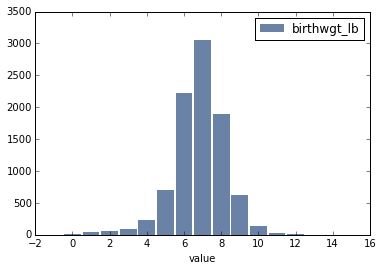

In [9]:
%matplotlib inline
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylable='frequency')

** Explore ** variable one at a time - and ** histogram ** is a good way to do that


In [4]:
import nsfg
preg = nsfg.ReadFemPreg()

In [5]:
live = preg[preg.outcome == 1]

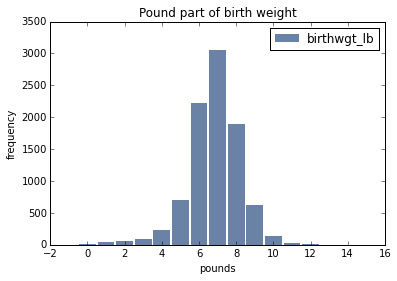

In [12]:
# plot birthwgt_lb for live birts
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency', 
               title='Pound part of birth weight')

** mode ** is 7

Distribution is approximately **bell-shaped** - shape of normal distribution - a.k.a **Gaussian distribution**. Unlike true normal it's asymmetric distribution, tail extends farther to the left than right

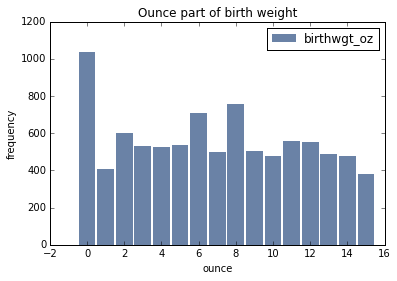

In [20]:
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthwgt_oz")
thinkplot.Hist(hist)
thinkplot.Show(xlabel='ounce', ylabel='frequency', 
               title='Ounce part of birth weight')

Theoritically expected distribution is **uniform** (all values should have same frequency. In fact 0 is more common and 1 & 15 are less common, may be because respondents round off birth weights to closest integers

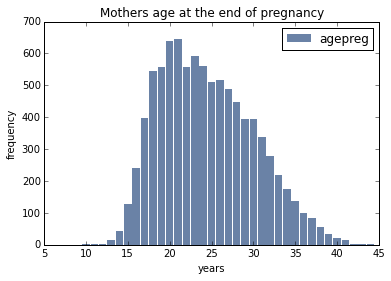

In [52]:
import numpy as np
hist = thinkstats2.Hist(np.floor(live.agepreg), label="agepreg")
thinkplot.Hist(hist)
thinkplot.Show(xlabel='years', ylabel='frequency', 
               title='Mothers age at the end of pregnancy')

mode is 21. Distribution is very roughtly bell-shaped, but tail extends farther to the right. Most mother are in their 20s, fewer in their 30s

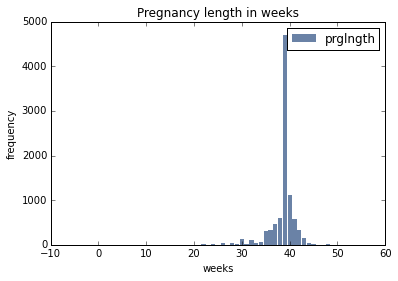

In [22]:
hist = thinkstats2.Hist(live.prglngth, label="prglngth")
thinkplot.Hist(hist)
thinkplot.Show(xlabel='weeks', ylabel='frequency', 
               title='Pregnancy length in weeks')

Most common value is 39 weeks. Left tail is longer, i.e. early babies are common but pregnancies seldom go past 43 weeks and doctors often intervene if they do

**Outliers** extreme values that might be errors in measurement and recording, or might be accurate report of rare events

In [23]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


- Values < 10 are certainly errors. May be outcome wasn't coded correctly. 
- Values > 30 weeks are probably legit
- 10 < Values < 30 - hard to be sure, some values probably error while some are premature babies

In [25]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


Most doctor recommend induced labor if pregnancy > 42 weeks, so some longer values are surprising. 50 weeks seems medically unlikely


Outlier detection depends on **domain knowledge**. 

Our question **'Whether first babies tend ot be early (or late)'** usually interested in full-term pregnancies, so lets focus on pregnancies > 27 weeks

**First babies**:
compare distribution of pregnancy lenghts for first babies and others

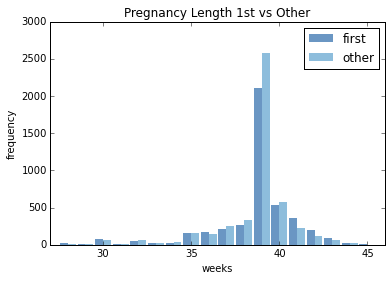

In [31]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

width = 0.45
thinkplot.PrePlot(2)
#align left right of the x tick (default is center)
thinkplot.Hist(first_hist, align='right', 
               width=width, label='first')
thinkplot.Hist(other_hist, align='left', 
               width=width, label='other')
#show only data between 27 and 46 weeks
thinkplot.Show(xlabel='weeks', ylabel='frequency', 
               title='Pregnancy Length 1st vs Other', 
               xlim=[27,46])

**Histogram** making most frequent values immediately apparent. But **not best choice for comparing two distribution**. => There are fewer 'first babies' than 'other', so apparent differences are due to **sample size**. **Probability Mass Function (PDF)** addresses this

** *Summarizing Distribution* **

*if details of distribution important we can present histogram*. But often use these descriptive statistics to summarize

- **Central Tendency** *cluster around particular point?*
- **Modes** *more than one cluster?*
- **Spread** *variability in the values* 
- **Tails** *how quickly probabilites drop off as they move away from modes?*
- **Outliers** *extreme values far from mode?*

** Summary Statistics **

- **Mean** - central tendency
- **Variance** - spread/variability
    
    [*mean squared deviation (x - mean x)^2 / n*]
    
    [*SQRT of variance is Standard Deviation*]
    

In [36]:
print("Mean: %s weeks"%live.prglngth.mean())
print("Variance: %s weeks"%live.prglngth.var())
print("Standard Deviation: %s weeks"%live.prglngth.std())

Mean: 38.5605596852 weeks
Variance: 7.30266206783 weeks
Standard Deviation: 2.70234381007 weeks


So, expecting 2-3 weeks deviation is common

In [41]:
firsts.prglngth.describe()

count    4413.000000
mean       38.600952
std         2.791901
min         0.000000
25%        39.000000
50%        39.000000
75%        40.000000
max        48.000000
dtype: float64

In [42]:
others.prglngth.describe()

count    4735.000000
mean       38.522914
std         2.615852
min         4.000000
25%        39.000000
50%        39.000000
75%        39.000000
max        50.000000
dtype: float64

**Effect Size**: Firsts vs others has 0.078 weeks (13 hrs or 0.2%) difference. If we assume this estimate is accurate, there is no practical consequences. In fact, without observing large number of pregnancies, it's unlikely anyone would notice difference at all.

**Cohen's d**: compare difference between groups to the variability within groups.

In [50]:
import math
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1+n2)
    d = diff / math.sqrt(pooled_var)
    return d
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449841

Difference in mean is small = 0.029 std dev. The difference in preg lenght between first and other babies is 0.029 SD

**Reporting results**

We have seen several ways to describe the difference in pregnancy length (if there is one) between first babies and others. How should we report these results?
The answer depends on **who is asking the question**. A scientist might be interested in *any (real) effect*, no matter how small. A doctor might only care about effects that are *clinically significant*; that is, differences that affect treatment decisions. A pregnant woman might be interested in results that are relevant to her, like the *probability of delivering early or late*.

How you report results also **depends on your goals**. If you are trying to *demonstrate the importance of an effect, you might choose summary statistics that emphasize differences*. If you are trying to reassure a patient, you might choose statistics that put the differences in context.

Of course your decisions should also be guided by **professional ethics**. It’s ok to be persuasive; you should design statistical reports and visualizations that tell a story clearly. But you should also do your best to make your reports honest, and to acknowledge uncertainty and limitations.

**Takeaway**

- **distribution**: The values that appear in a sample and the frequency of each.
- **histogram**: A mapping from values to frequencies, or a graph that shows this mapping.
- **frequency**: The number of times a value appears in a sample.
- **mode**: The most frequent value in a sample, or one of the most frequent values.
- **normal distribution**: An idealization of a bell-shaped distribution; also known as a Gaussian distribution.
- **uniform distribution**: A distribution in which all values have the same frequency.
- **tail**: The part of a distribution at the high and low extremes.
- **central tendency**: A characteristic of a sample or population; intuitively, it is an average or typical value.
- **outlier**: A value far from the central tendency.
- **spread**: A measure of how spread out the values in a distribution are.
- **summary statistic**: A statistic that quantifies some aspect of a distribution, like central tendency or spread.
- **variance**: A summary statistic often used to quantify spread.
- **standard deviation**: The square root of variance, also used as a measure of spread.
- **effect size**: A summary statistic intended to quantify the size of an effect like a difference between groups.
- **clinically significant**: A result, like a difference between groups, that is relevant in practice.

#[Chapter 3 *Probability Mass Function*][chapter-3]
[chapter-3]: http://greenteapress.com/thinkstats2/html/thinkstats2004.html

- **Probability Mass Function (PMF):** represent distribution as a function of values to probabilities
- **Probability:** a frequency expressed as a fraction of the sample size
- **Normalization:**  = (frequency / sample_size)
- **Index:** special pandas df column coantains row labels

```python
n = hist.Total()
d = {}
for x, freq in hist.Items():
    d[x] = freq / n
```

In [69]:
#class Pmf
import thinkstats2
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

*Pmf is normalized, so total probability is 1*

* Hist - maps from values to integer counters
* Pmf - maps from values to float probabilities

In [70]:
pmf.Total()

1.0

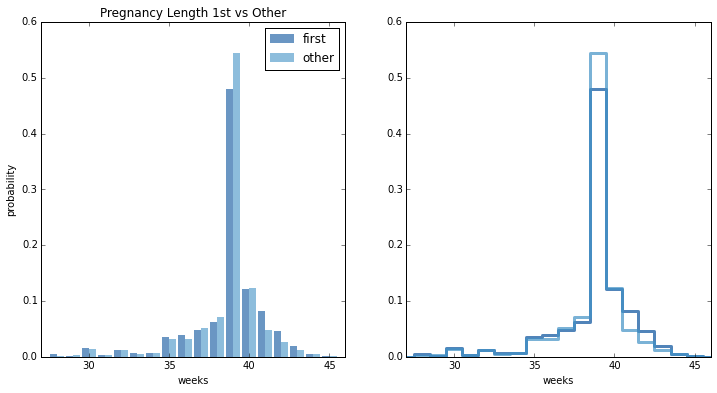

In [77]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_pmf = thinkstats2.Pmf(firsts.prglngth)
other_pmf = thinkstats2.Pmf(others.prglngth)

width = 0.45
thinkplot.PrePlot(2, cols=2)
#align left right of the x tick (default is center)
thinkplot.Hist(first_pmf, align='right', 
               width=width, label='first')
thinkplot.Hist(other_pmf, align='left', 
               width=width, label='other')
#show only data between 27 and 46 weeks
thinkplot.Config(xlabel='weeks', ylabel='probability', 
               title='Pregnancy Length 1st vs Other', 
               axis=[27,46,0,0.6])

thinkplot.PrePlot(2) #reset color generator
thinkplot.SubPlot(2) #switch to second figure
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=[27,46,0,0.6]) #axis option ensure two figures are on same axes

*by plotting PMF instead of histogram, we can compare two distributions without being misled by the difference in sample size.*

first babies seems to be less likely than others to arrive on time (week 39) and more likely to be late

* Histograms and PMFs are useful while exploring data and trying to identify pattern and relationships

- Next Step: visualization that represent already identified patterns clearly
    - Lets now zoom in to the part where the biggest differnces is in the distribution (near the mode)

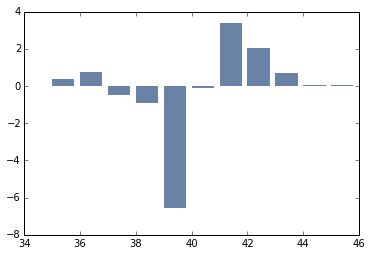

In [79]:
weeks = range(35, 46)
diffs = [] #diff between 2 PMFs in percentage
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.Bar(weeks, diffs)

- First babies are less likely to be born in week-39
- First babies are more likely to be born in week 41 and 42

*but we are not sure if this effect is real; it might be due to a random variation*